In [1]:
!pip install -q opencv-python

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

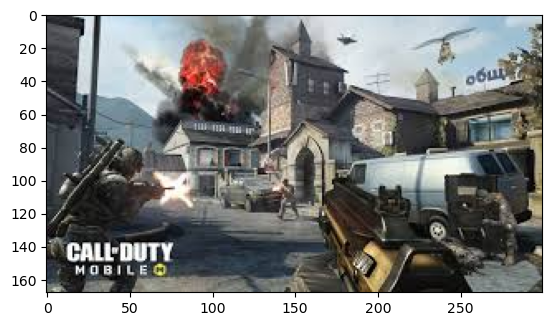

In [9]:
image = cv2.imread(r"C:\Users\DS17\Desktop\IVP 011\Spatial filtering techniques\download.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# cv2.imshow("image",image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(image)

### Linear Filters

In [30]:
# Box Filters
kernel = np.ones((3,3))/9

filtered_image = cv2.filter2D(image, 0, kernel)

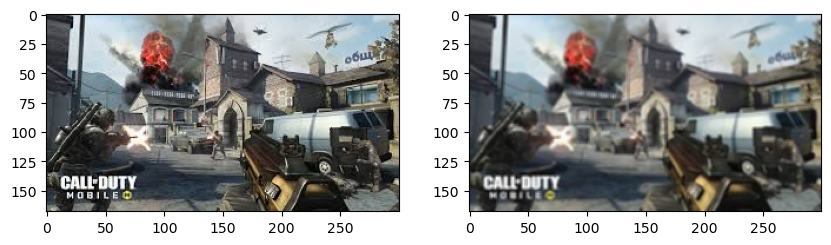

In [32]:
plt.figure(figsize=(10,7))

plt.subplot(1,2,1)
plt.imshow(image)

plt.subplot(1,2,2)
plt.imshow(filtered_image)
plt.show()

In [35]:
image.shape

(168, 300, 3)

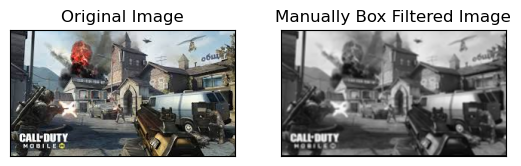

In [37]:
(rows, cols) = image.shape[0:2]

# Define the kernel size (3x3)
kernel_size = 3
k = kernel_size // 2  # kernel radius

# Create an output image
box_filtered_image = np.zeros_like(image)

# Apply the Box Filter (Mean Filter) manually
for i in range(k, rows - k):
    for j in range(k, cols - k):
        # Extract the kernel region (neighborhood)
        region = image[i - k:i + k + 1, j - k:j + k + 1]
        
        # Compute the mean of the region
        box_filtered_image[i, j] = np.mean(region)
        
plt.subplot(1, 2, 1), plt.imshow(image)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2), plt.imshow(box_filtered_image)
plt.title('Manually Box Filtered Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [70]:
# Gaussian filters hard coded
image = cv2.imread(r"C:\Users\DS17\Desktop\IVP 011\Spatial filtering techniques\download.jpeg", cv2.IMREAD_GRAYSCALE)

#convert into frequency domain
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)
rows, cols = image.shape
# centers of rows and cols
crows, ccols = rows//2, cols//2
sigma = 30

In [71]:
mask = np.zeros((rows,cols), np.float32)
for u in range(rows):
    for v in range(cols):
        distance = np.sqrt((u-crows)**2 + (v-ccols)**2)
        mask[u,v] = np.exp(-(distance**2)/2*(sigma**2))
        
fshift_filtered = fshift * mask

f_ishift = np.fft.ifftshift(fshift_filtered)
image_filtered = np.fft.ifft2(f_ishift)
image_filtered = np.abs(fshift_filtered)

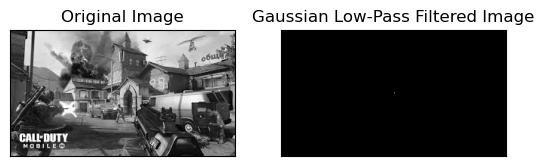

In [72]:
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2), plt.imshow(image_filtered, cmap='gray')
plt.title('Gaussian Low-Pass Filtered Image'), plt.xticks([]), plt.yticks([])

plt.show()

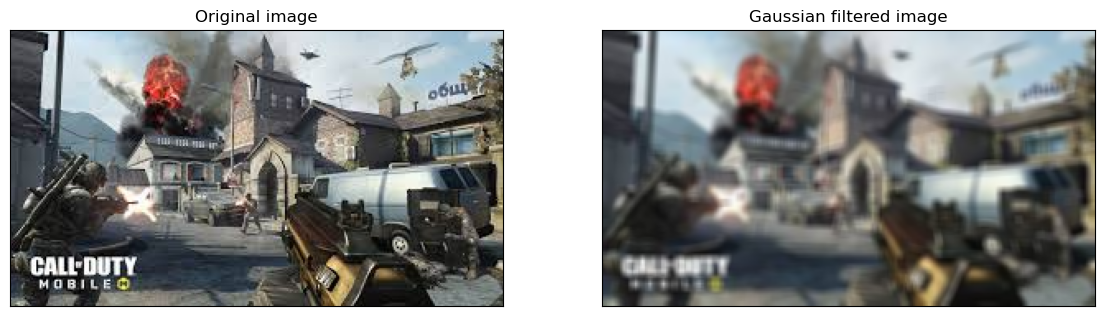

In [61]:
# Gaussian filter using opencv
image = cv2.imread(r"C:\Users\DS17\Desktop\IVP 011\Spatial filtering techniques\download.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

kernel1 = np.ones((5,5))
filtered_image = cv2.GaussianBlur(image, (5,5), 21) # sigma=21

plt.figure(figsize=(14,10))

plt.subplot(1,2,1)
plt.title("Original image"), plt.xticks([]), plt.yticks([])
plt.imshow(image)

plt.subplot(1,2,2)
plt.title("Gaussian filtered image"), plt.xticks([]), plt.yticks([])
plt.imshow(filtered_image)
plt.show()

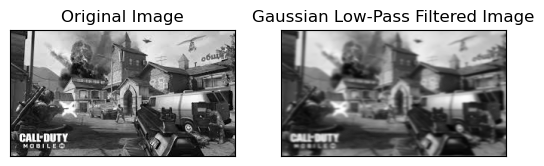

In [62]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread(r"C:\Users\DS17\Desktop\IVP 011\Spatial filtering techniques\download.jpeg", cv2.IMREAD_GRAYSCALE)

# Perform FFT to transform the image into frequency domain
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)  # Shift zero frequency component to the center

# Get the image dimensions
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2  # Center of the image
sigma = 30  # Standard deviation for Gaussian function

# Create the Gaussian Low-Pass Filter mask
mask = np.zeros((rows, cols), np.float32)
for u in range(rows):
    for v in range(cols):
        distance = np.sqrt((u - crow)**2 + (v - ccol)**2)
        mask[u, v] = np.exp(-(distance**2) / (2 * sigma**2))

# Apply the mask to the frequency domain image
fshift_filtered = fshift * mask

# Inverse FFT to get the filtered image back in spatial domain
f_ishift = np.fft.ifftshift(fshift_filtered)
image_filtered = np.fft.ifft2(f_ishift)
image_filtered = np.abs(image_filtered)

# Display the original and filtered image
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2), plt.imshow(image_filtered, cmap='gray')
plt.title('Gaussian Low-Pass Filtered Image'), plt.xticks([]), plt.yticks([])

plt.show()
